In [1]:
import spacy
from spacy.lang.pt import stop_words
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd
import ast
import os
#!python -m spacy download pt_core_news_sm

## Carregamento de arquivos

In [2]:
pasta_base = 'C:/Users/nicolly.lira/Desktop/tcc/arquivos_tratados'
arquivo = os.path.join(pasta_base, 'submission_palavras_contadas.csv')
df_submissions = pd.read_csv(arquivo, sep = ',', encoding = 'utf-8')

In [3]:
df_submissions['full_text'] = df_submissions['full_text'].apply(ast.literal_eval)
df_submissions.head()

,coments,created,id,selftext,title,up,full_text,qtd_term
0,58.0,1.594245e+09,t3_hnqcmv,Tava mexendo no meu computador antigo e achei ...,Ela percebeu,2208.0,"[ela, percebeu, tava, mexendo, no, meu, comput...",4
1,352.0,1.671150e+09,t3_zn0wi8,Normalmente eu almoço na empresa mas hoje me d...,Me namorado fez uma coisa que me deixou toda b...,1944.0,"[me, namorado, fez, uma, coisa, que, me, deixo...",2
2,118.0,1.610661e+09,t3_kxfnzb,"Olá, meu nome é Gabriel, tenho 18 anos e moro ...",Hoje é o dia mais sombrio da minha cidade.,1850.0,"[hoje, e, o, dia, mais, sombrio, da, minha, ci...",10
3,349.0,1.631280e+09,t3_plkxny,"Hoje eu me caso com o homem da minha vida, e n...","Hoje eu me caso, e ninguém da minha família va...",1779.0,"[hoje, eu, me, caso, , e, ninguem, da, minha, ...",2
4,327.0,1.601058e+09,t3_izowvi,"Olá brasileiros, vou tentar por em palavras oq...",Minha mãe provavelmente vai morrer nas próxima...,1624.0,"[minha, mae, provavelmente, vai, morrer, nas, ...",11


## Separação dos grupos: muitos termos do léxico x controle

<Axes: >

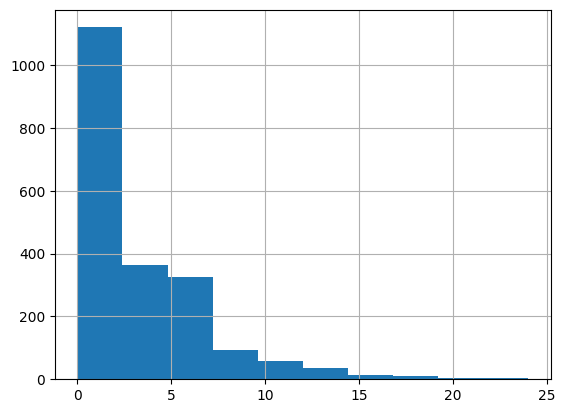

In [4]:
df_submissions['qtd_term'].hist()

In [5]:
df_depressed = df_submissions[df_submissions['qtd_term'] > 5]
df_depressed.reset_index(drop=True, inplace = True)
df_control = df_submissions[df_submissions['qtd_term'] <= 5]
df_control.reset_index(drop=True, inplace = True)

In [6]:
df_depressed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   coments    391 non-null    float64
 1   created    391 non-null    float64
 2   id         391 non-null    object 
 3   selftext   391 non-null    object 
 4   title      391 non-null    object 
 5   up         391 non-null    float64
 6   full_text  391 non-null    object 
 7   qtd_term   391 non-null    int64  
dtypes: float64(3), int64(1), object(4)
memory usage: 24.6+ KB


In [7]:
df_control.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1637 entries, 0 to 1636
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   coments    1637 non-null   float64
 1   created    1637 non-null   float64
 2   id         1637 non-null   object 
 3   selftext   1634 non-null   object 
 4   title      1637 non-null   object 
 5   up         1637 non-null   float64
 6   full_text  1637 non-null   object 
 7   qtd_term   1637 non-null   int64  
dtypes: float64(3), int64(1), object(4)
memory usage: 102.4+ KB


## Contar palavras e definir stop words

#### Contando a frequencia das palavras e retirando as menos frequentes

In [8]:
def count_words(df_serie):
    word_frequency_dict = {}
    for submission_list in df_serie:
        for word in submission_list:
            if word not in word_frequency_dict.keys():
                word_frequency_dict[word] = 1
            else:
                word_frequency_dict[word] +=1
    return word_frequency_dict

In [9]:
def get_key_value_by_value(word_frequency_dict, search_value):
    dict_by_values = {}
    for key, value in word_frequency_dict.items():
        if value == search_value:
            dict_by_values[key] = value
    return dict_by_values
    # Return None if the value is not found in the dictionary
    return None, None

In [69]:
def complementaries_words(corpus_list):
    '''
        Mapeando classes gramaticais e mantendo apenas verbos, 
        substantivos e adjetivos fora das stop words
    '''
    nlp_spacy = spacy.load("pt_core_news_sm")
    full_text = ' '.join(corpus_list)
    part_of_speach = nlp_spacy(full_text)
    
    complementaries_words_list = []
    for token in part_of_speach:
        if str(token.pos_) not in ('ADJ', 'NOUN', 'PRON', 'VERB'):
            complementaries_words_list.append(token.text)
    return complementaries_words_list

In [83]:
def full_stop_words(df_serie, search_value):
    full_stop_words_list = list(stop_words.STOP_WORDS)
    word_frequency_dict = count_words(df_serie)

    dict_by_values = get_key_value_by_value(word_frequency_dict, search_value)
    low_frequency_words = list(dict_by_values.keys())
    complementaries_words_list = complementaries_words(word_frequency_dict.keys())

    full_stop_words_list += low_frequency_words
    full_stop_words_list += complementaries_words_list
    
    return list(set(full_stop_words_list))

## Word cloud

### spacy

In [84]:
full_stop_words = full_stop_words(df_depressed['full_text'], 1)

In [85]:
clean_words = [word for text in df_depressed['full_text'] for word in text if word not in full_stop_words]
clean_corpus = ' '.join(clean_words)

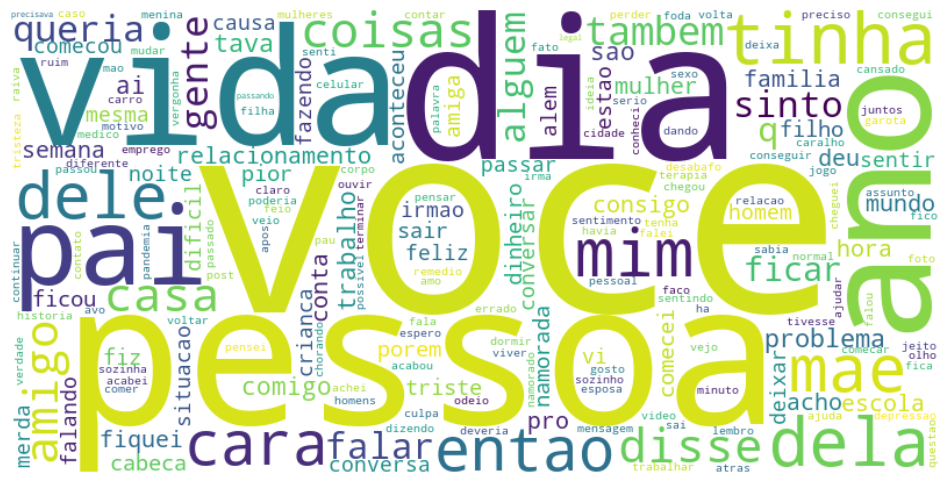

In [86]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(clean_corpus)

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
'pra', 'nao', 'ate', 'ja', 'etc', 'porem', 'ta', 'estao', 'pro', 'alguma', 'vao', 'oq', 'n', 'q', 'pq', 'voce', 'apos', 'ne', 'muita', 'mim', 'dela', 'literalmente', 'acho', 'la', 'ha', 'ate', 'ha', 'fico', 'ficou', 'ai', 'fica', 'estao', 'poderia', 'edit', ''

______________________________________________________
### Parte 2
______________________________________________________

In [98]:
df_depressed['coments']
df_depressed['qtde_term']
df_depressed['up']

,coments,created,id,selftext,title,up,full_text,qtd_term
0,118.0,1.610661e+09,t3_kxfnzb,"Olá, meu nome é Gabriel, tenho 18 anos e moro ...",Hoje é o dia mais sombrio da minha cidade.,1850.0,"[hoje, e, o, dia, mais, sombrio, da, minha, ci...",10
1,327.0,1.601058e+09,t3_izowvi,"Olá brasileiros, vou tentar por em palavras oq...",Minha mãe provavelmente vai morrer nas próxima...,1624.0,"[minha, mae, provavelmente, vai, morrer, nas, ...",11
2,808.0,1.658598e+09,t3_w69jxb,"Em 2019 reencontrei minha primeira namorada, v...",Meu casamento me destruiu financeiramente.,1558.0,"[meu, casamento, me, destruiu, financeiramente...",7
3,159.0,1.625659e+09,t3_ofhi4n,Eu to vendo alguns desabafos sobre homens não ...,"Homem, entenda uma coisa: se você está trabalh...",1533.0,"[homem, , entenda, uma, coisa, , se, voce, est...",7
4,148.0,1.616290e+09,t3_m9l8o0,"Sou médico anestesista, trabalho na linha de f...",Sabe o real motivo pelo qual você deveria fica...,1517.0,"[sabe, o, real, motivo, pelo, qual, voce, deve...",11


In [103]:
from matplotlib import pyplot as plt

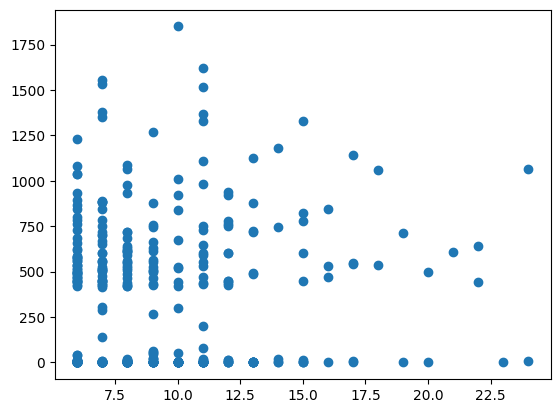

In [106]:
plt.scatter(df_depressed['qtd_term'],df_depressed['up'])

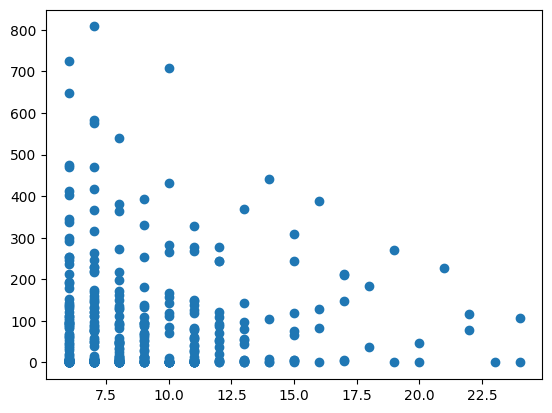

In [108]:
plt.scatter(df_depressed['qtd_term'],df_depressed['coments'])

<Axes: xlabel='qtd_term', ylabel='coments'>

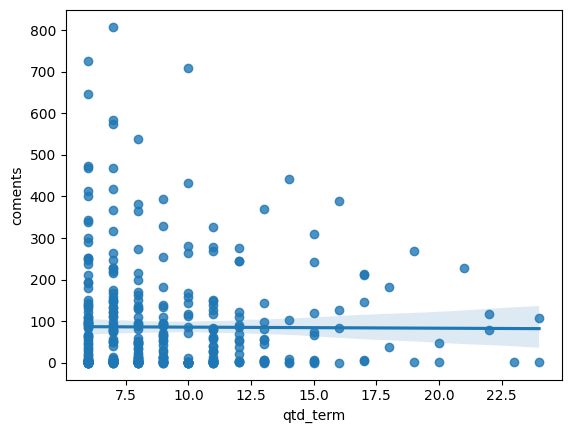

In [110]:
import seaborn as sns

sns.regplot(x=df_depressed['qtd_term'],y=df_depressed['coments'])

<Axes: xlabel='qtd_term', ylabel='up'>

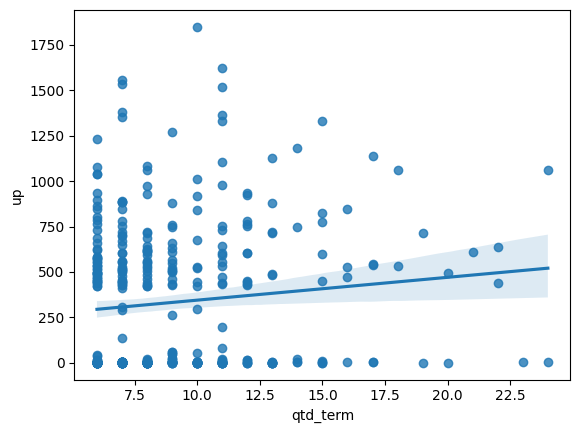

In [112]:
sns.regplot(x=df_depressed['qtd_term'],y=df_depressed['up'])